In [93]:
import numpy as np
import pandas as pd
from Project.teacher_bot.churn_prediction import ChurnPrediction

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder 
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

import xgboost as xgb
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [94]:
BotProductStar = ChurnPrediction()

Привет! Приятно познакомиться!


In [95]:
train=pd.read_csv('./Project/data/train.csv')
test=pd.read_csv('./Project/data/test.csv')
train.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0


In [96]:
train.shape

(7200, 14)

In [97]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

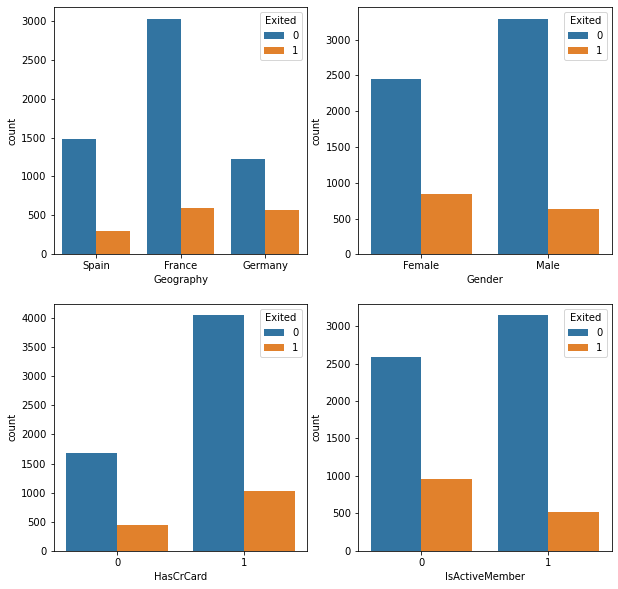

In [98]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(x='Geography', hue='Exited', data=train, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=train, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=train, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=train, ax=axarr[1][1])


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

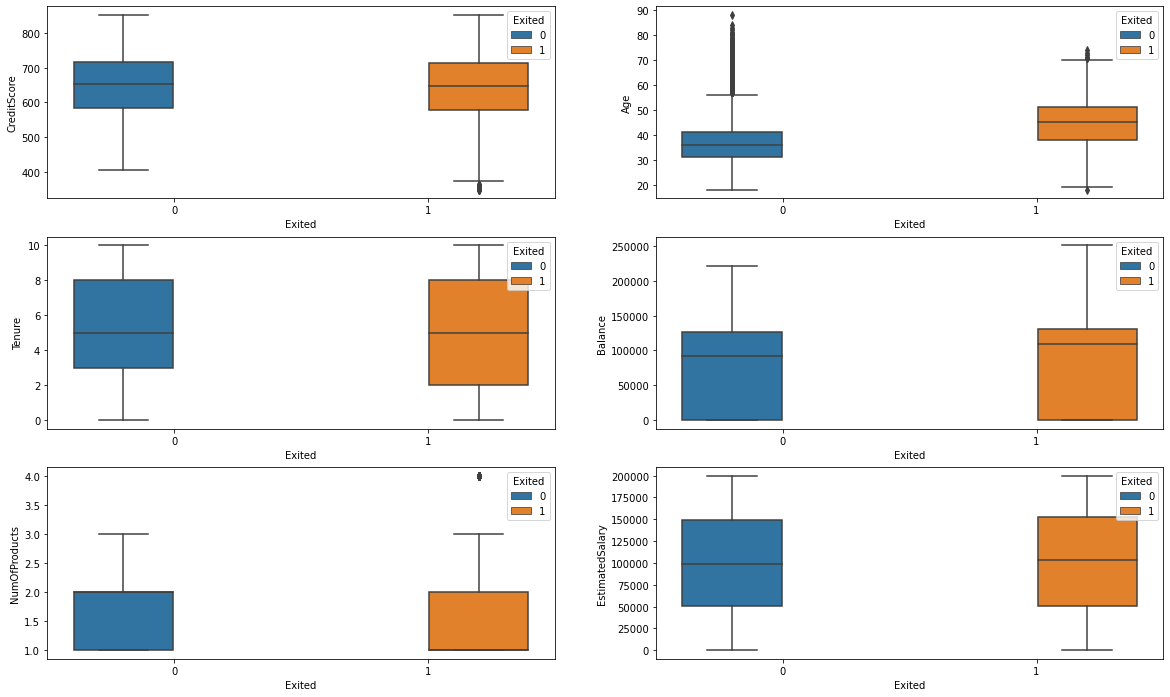

In [99]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = train, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = train , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][1])

In [100]:
train.nunique()

RowNumber          7200
CustomerId         7200
Surname            2459
CreditScore         455
Geography             3
Gender                2
Age                  68
Tenure               11
Balance            4566
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    7200
Exited                2
dtype: int64

In [101]:
x_train = train.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y_train = train['Exited']
x_test=test.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(f'x_train={x_train.shape}  y_train={y_train.shape}  x_test={x_test.shape}')

x_train=(7200, 10)  y_train=(7200,)  x_test=(800, 10)


In [102]:
BotProductStar.test_task(train)

Думаю...
Ого! Датасет, сейчас мы будем его исследовать, интересно, что в нем.
Сам я не справляюсь - нужна твоя помощь


In [103]:
BotProductStar.drop_task(df=x_train, answer=train)

Думаю...
Думаю...
Кодовая фраза Data
Ура! Первое задание позади!


In [104]:
x_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [105]:
BotProductStar.null_task('нет')

Думаю...
Ура! Второе задание позади!
Следующая кодовая фраза Science


In [106]:
for i in x_train.dtypes[x_train.dtypes==object].keys():
    print(f'------{i}------')
    print(x_train[i].value_counts())

------Geography------
France     3617
Germany    1796
Spain      1787
Name: Geography, dtype: int64
------Gender------
Male      3921
Female    3279
Name: Gender, dtype: int64


## Переводим столбец Gender в бинарный вид

In [107]:
enc=OrdinalEncoder()
x_train[['Gender']]=enc.fit_transform(x_train[['Gender']])
x_test[['Gender']]=enc.transform(x_test[['Gender']])
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,461,Spain,0.0,25,6,0.00,2,1,1,15306.29
1,619,France,0.0,35,4,90413.12,1,1,1,20555.21
2,699,France,0.0,40,8,122038.34,1,1,0,102085.35
3,558,Germany,1.0,41,2,124227.14,1,1,1,111184.67
4,638,France,1.0,34,5,133501.36,1,0,1,155643.04
...,...,...,...,...,...,...,...,...,...,...
7195,706,Spain,1.0,30,6,87609.68,2,0,0,137674.55
7196,587,Germany,1.0,33,6,132603.36,1,1,0,55775.72
7197,850,Germany,0.0,45,5,127258.79,1,1,1,192744.23
7198,793,Spain,1.0,25,3,100913.57,1,0,0,10579.72


## Заменяем столбец Geography по частоте

In [108]:
freq_encoder=x_train['Geography'].value_counts()
x_train['Geography']=x_train['Geography'].map(freq_encoder)
x_test['Geography']=x_test['Geography'].map(freq_encoder)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,461,1787,0.0,25,6,0.00,2,1,1,15306.29
1,619,3617,0.0,35,4,90413.12,1,1,1,20555.21
2,699,3617,0.0,40,8,122038.34,1,1,0,102085.35
3,558,1796,1.0,41,2,124227.14,1,1,1,111184.67
4,638,3617,1.0,34,5,133501.36,1,0,1,155643.04
...,...,...,...,...,...,...,...,...,...,...
7195,706,1787,1.0,30,6,87609.68,2,0,0,137674.55
7196,587,1796,1.0,33,6,132603.36,1,1,0,55775.72
7197,850,1796,0.0,45,5,127258.79,1,1,1,192744.23
7198,793,1787,1.0,25,3,100913.57,1,0,0,10579.72


## Масштабирование признаков с использованием стандартизации и MinMax

In [109]:
standard=StandardScaler()

standard.fit(x_train)
x_train_standard=standard.transform(x_train)

standard.fit(x_test)
x_test_standard=standard.transform(x_test)

min_max=MinMaxScaler()

min_max.fit(x_train)
x_train_min_max=min_max.transform(x_train)

min_max.fit(x_test)
x_test_min_max=min_max.transform(x_test)

## LogisticRegression without scaler

In [110]:
logistic_regression=LogisticRegression(max_iter=1000)

In [111]:
logistic_regression.fit(x_train, y_train)
proba=logistic_regression.predict_proba(x_test)

x_test_LR_1=test[['RowNumber']].copy()
x_test_LR_1['predict']=proba[:, 1]

In [112]:
BotProductStar.production_quality(x_test_LR_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.7125378961667521
Думаю...
А что если попробовать бустинг?


## LogisticRegression with StandardScaler & MinMaxScaler

In [113]:
logistic_regression.fit(x_train_standard, y_train)
proba=logistic_regression.predict_proba(x_test_standard)

x_test_LR_2=test[['RowNumber']].copy()
x_test_LR_2['predict']=proba[:, 1]

In [114]:
BotProductStar.production_quality(x_test_LR_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.7823927887080668
Думаю...
Нужно качество больше 0.80, я верю - у тебя получится!


In [115]:
logistic_regression.fit(x_train_min_max, y_train)
proba=logistic_regression.predict_proba(x_test_min_max)

x_test_LR_3=test[['RowNumber']].copy()
x_test_LR_3['predict']=proba[:, 1]

In [116]:
BotProductStar.production_quality(x_test_LR_3)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.7805305913151431
Думаю...
А что если попробовать бустинг?


## Decision Tree with max_depth default

In [117]:
decision_tree_def=DecisionTreeClassifier(random_state=27)
decision_tree_def.fit(x_train, y_train)

proba=decision_tree_def.predict_proba(x_test)

x_test_DF_1=test[['RowNumber']].copy()
x_test_DF_1['predict']=proba[:, 1]

In [118]:
BotProductStar.production_quality(x_test_DF_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.6793601957556293
Думаю...
Нужно качество больше 0.80, я верю - у тебя получится!


## Decision Tree with max_depth=7

In [119]:
decision_tree_2=DecisionTreeClassifier(max_depth=7, random_state=27)
decision_tree_2.fit(x_train, y_train)

proba=decision_tree_2.predict_proba(x_test)

x_test_DF_2=test[['RowNumber']].copy()
x_test_DF_2['predict']=proba[:, 1]

In [120]:
BotProductStar.production_quality(x_test_DF_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8392302917442581
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## Bagging with default parameters

In [121]:
%%time
bagging_def = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=27), random_state=27, n_jobs=2)
bagging_def.fit(x_train, y_train)

proba=bagging_def.predict_proba(x_test)

x_test_Bag_1=test[['RowNumber']].copy()
x_test_Bag_1['predict']=proba[:, 1]

Wall time: 131 ms


In [122]:
BotProductStar.production_quality(x_test_Bag_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8297123939582041
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## Bagging with max_depth=7

In [123]:
%%time
bagging_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7, random_state=27), random_state=27, n_jobs=2)
bagging_2.fit(x_train, y_train)

proba=bagging_2.predict_proba(x_test)

x_test_Bag_2=test[['RowNumber']].copy()
x_test_Bag_2['predict']=proba[:, 1]

Wall time: 115 ms


In [124]:
BotProductStar.production_quality(x_test_Bag_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8609109473816785
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## Random Forest with default parameters

In [125]:
%%time
random_forest_def=RandomForestClassifier(random_state=27)
random_forest_def.fit(x_train, y_train)

proba=random_forest_def.predict_proba(x_test)

x_test_RF_1=test[['RowNumber']].copy()
x_test_RF_1['predict']=proba[:, 1]

Wall time: 795 ms


In [126]:
BotProductStar.production_quality(x_test_RF_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8725114475660989
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## Random Forest with n_estimators=1000 & max_depth=12

In [127]:
%%time
random_forest_2=RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=27)
random_forest_2.fit(x_train, y_train)

proba=random_forest_2.predict_proba(x_test)

x_test_RF_2=test[['RowNumber']].copy()
x_test_RF_2['predict']=proba[:, 1]

Wall time: 6.73 s


In [128]:
BotProductStar.production_quality(x_test_RF_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8744771003697407
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## XGBoost with default parameters

In [129]:
%%time
XGBoost_def = xgb.XGBClassifier(ramdon_state=27)
XGBoost_def.fit(x_train, y_train)

proba=XGBoost_def.predict_proba(x_test)

x_test_XGB_1=test[['RowNumber']].copy()
x_test_XGB_1['predict']=proba[:, 1]

[01:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "ramdon_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 608 ms


In [130]:
BotProductStar.production_quality(x_test_XGB_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8554413047976323
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## XGBoost with parameters

In [131]:
xgb_param = {
    'booster': 'gbtree',
    'objective':'binary:logistic',
    'eval_metric' : 'auc',
    'learning_rate' : 0.01,
    'reg_lambda' : 100,
    'max_depth':14,
    'nthread' : 6,
    'gamma' : 10,
    'seed' : 27
    }

dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test)
#dtest = xgb.DMatrix(data=x_valid, label=y_valid)



In [132]:
%%time
XGBoost_2 = xgb.XGBClassifier(ramdon_state=27)

evals_result = {}

XGBoosl_2 = xgb.train(
    params=xgb_param,
    dtrain=dtrain,
    num_boost_round=1000,
    maximize=True,
    early_stopping_rounds=50,
    evals_result=evals_result,
    evals=[(dtrain, 'train')],
    verbose_eval=25
)

proba=XGBoosl_2.predict(dtest)

x_test_XGB_2=test[['RowNumber']].copy()
x_test_XGB_2['predict']=proba

[0]	train-auc:0.74026
[25]	train-auc:0.76062
[50]	train-auc:0.76093
[75]	train-auc:0.81652
[100]	train-auc:0.81832
[125]	train-auc:0.82284
[150]	train-auc:0.82871
[175]	train-auc:0.83544
[200]	train-auc:0.84247
[225]	train-auc:0.84779
[250]	train-auc:0.85061
[275]	train-auc:0.85303
[300]	train-auc:0.85504
[325]	train-auc:0.85740
[350]	train-auc:0.85958
[375]	train-auc:0.86072
[400]	train-auc:0.86247
[425]	train-auc:0.86398
[450]	train-auc:0.86519
[475]	train-auc:0.86620
[500]	train-auc:0.86723
[525]	train-auc:0.86808
[550]	train-auc:0.86873
[575]	train-auc:0.86936
[600]	train-auc:0.86976
[625]	train-auc:0.87001
[650]	train-auc:0.87010
[675]	train-auc:0.87010
[685]	train-auc:0.87010
Wall time: 6.61 s


In [133]:
BotProductStar.production_quality(x_test_XGB_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.868526165222789
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## CatBoost with default parameters

In [134]:
%%time
CatBoost_def = cb.CatBoostClassifier(random_state=27)
CatBoost_def.fit(x_train, y_train)

proba=CatBoost_def.predict_proba(x_test)

x_test_CatB_1=test[['RowNumber']].copy()
x_test_CatB_1['predict']=proba[:, 1]

Learning rate set to 0.023934
0:	learn: 0.6716804	total: 7.38ms	remaining: 7.38s
1:	learn: 0.6553202	total: 15.3ms	remaining: 7.61s
2:	learn: 0.6367122	total: 23.3ms	remaining: 7.74s
3:	learn: 0.6249265	total: 28.7ms	remaining: 7.16s
4:	learn: 0.6092254	total: 32.6ms	remaining: 6.49s
5:	learn: 0.5957998	total: 35.5ms	remaining: 5.88s
6:	learn: 0.5826881	total: 38.9ms	remaining: 5.51s
7:	learn: 0.5704809	total: 42.2ms	remaining: 5.23s
8:	learn: 0.5586412	total: 45.6ms	remaining: 5.02s
9:	learn: 0.5482804	total: 49.2ms	remaining: 4.87s
10:	learn: 0.5370435	total: 52.7ms	remaining: 4.74s
11:	learn: 0.5278282	total: 56ms	remaining: 4.61s
12:	learn: 0.5176319	total: 59.3ms	remaining: 4.5s
13:	learn: 0.5086009	total: 62.8ms	remaining: 4.42s
14:	learn: 0.5001457	total: 66.2ms	remaining: 4.35s
15:	learn: 0.4908340	total: 69.6ms	remaining: 4.28s
16:	learn: 0.4835644	total: 72.6ms	remaining: 4.2s
17:	learn: 0.4775828	total: 76.1ms	remaining: 4.15s
18:	learn: 0.4698770	total: 79.4ms	remaining: 4.

In [135]:
BotProductStar.production_quality(x_test_CatB_1)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8640056135805468
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


## CatBoost with parameters

In [136]:
%%time
cb_param = {
    'n_estimators' : 5000,
    'learning_rate' : 0.01,
    'loss_function' : 'Logloss',
    'eval_metric' : 'AUC',
    'task_type' : 'CPU',
    'verbose' : False,
    'max_depth':12,
    'l2_leaf_reg' : 10,
    'early_stopping_rounds' : 50,
    'thread_count': 6,
    'random_seed' : 42
    }

cb_train = cb.Pool(data=x_train, label=y_train, cat_features=None)
cb_valid = cb.Pool(data=x_test, cat_features=None)

Wall time: 2 ms


In [137]:
%%time
CatBoost_2 = cb.CatBoostClassifier(random_state=27)
CatBoost_2 = cb.train(
    params=cb_param,
    dtrain=cb_train,
    eval_set=[cb_train],
    plot=True
)
proba=CatBoost_2.predict(cb_valid)

x_test_CB_2=test[['RowNumber']].copy()
x_test_CB_2['predict']=proba

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [138]:
BotProductStar.production_quality(x_test_CB_2)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8559990644032422
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


In [147]:
aa=pd.DataFrame(np.corrcoef(x_train, rowvar=False))
aa

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000501,-0.008107,-0.011517,-0.007905,0.000625,0.004678,-0.006078,0.028511,0.000017
1,0.000501,1.000000,-0.004996,-0.042685,0.003648,-0.230386,-0.001737,-0.000219,-0.004296,0.001654
2,-0.008107,-0.004996,1.000000,-0.033936,0.015591,0.012691,-0.016243,-0.000574,0.035097,-0.002389
3,-0.011517,-0.042685,-0.033936,1.000000,-0.019830,0.019470,-0.039869,-0.004425,0.091727,-0.015247
4,-0.007905,0.003648,0.015591,-0.019830,1.000000,-0.017523,0.005374,0.013444,-0.038104,0.002764
5,0.000625,-0.230386,0.012691,0.019470,-0.017523,1.000000,-0.308636,-0.008598,-0.009025,0.007583
6,0.004678,-0.001737,-0.016243,-0.039869,0.005374,-0.308636,1.000000,0.003356,0.006233,0.008303
7,-0.006078,-0.000219,-0.000574,-0.004425,0.013444,-0.008598,0.003356,1.000000,-0.005128,-0.013760
8,0.028511,-0.004296,0.035097,0.091727,-0.038104,-0.009025,0.006233,-0.005128,1.000000,-0.018682
9,0.000017,0.001654,-0.002389,-0.015247,0.002764,0.007583,0.008303,-0.013760,-0.018682,1.000000


In [154]:
x_train.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,0.000501,-0.008107,-0.011517,-0.007905,0.000625,0.004678,-0.006078,0.028511,0.000017
Geography,0.000501,1.000000,-0.004996,-0.042685,0.003648,-0.230386,-0.001737,-0.000219,-0.004296,0.001654
Gender,-0.008107,-0.004996,1.000000,-0.033936,0.015591,0.012691,-0.016243,-0.000574,0.035097,-0.002389
Age,-0.011517,-0.042685,-0.033936,1.000000,-0.019830,0.019470,-0.039869,-0.004425,0.091727,-0.015247
Tenure,-0.007905,0.003648,0.015591,-0.019830,1.000000,-0.017523,0.005374,0.013444,-0.038104,0.002764
Balance,0.000625,-0.230386,0.012691,0.019470,-0.017523,1.000000,-0.308636,-0.008598,-0.009025,0.007583
NumOfProducts,0.004678,-0.001737,-0.016243,-0.039869,0.005374,-0.308636,1.000000,0.003356,0.006233,0.008303
HasCrCard,-0.006078,-0.000219,-0.000574,-0.004425,0.013444,-0.008598,0.003356,1.000000,-0.005128,-0.013760
IsActiveMember,0.028511,-0.004296,0.035097,0.091727,-0.038104,-0.009025,0.006233,-0.005128,1.000000,-0.018682
EstimatedSalary,0.000017,0.001654,-0.002389,-0.015247,0.002764,0.007583,0.008303,-0.013760,-0.018682,1.000000
